In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [52]:
# Load impedance data
data = pd.read_csv('data.csv')

# Display the first few rows
data.head()


,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [53]:
# Check for missing values
data.isnull().sum()


Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A.DA      0
Max.IP    0
DR        0
P         0
dtype: int64

In [54]:
# Basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    object 
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A.DA    106 non-null    float64
 7   Max.IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.4+ KB


In [55]:
# Descriptive statistics of the dataset
data.describe()


,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [56]:
print(data.columns)


Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA', 'Max.IP', 'DR',
       'P'],
      dtype='object')


In [57]:
data.columns = data.columns.str.strip()


<Axes: title={'center': 'Class Distribution: Benign vs Malignant'}, xlabel='Class'>

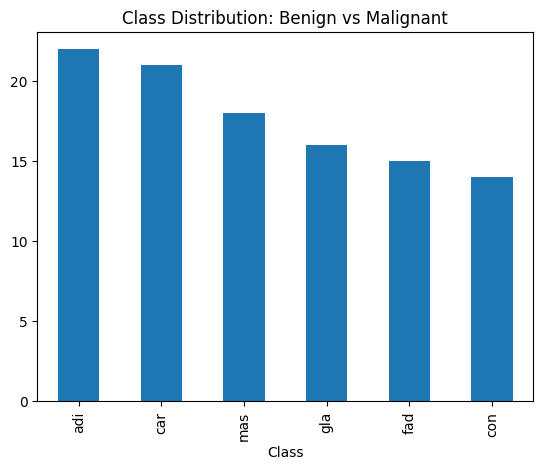

In [58]:
# Assuming 'Class' is the column that contains the labels for 'Benign' and 'Malignant'
data['Class'].value_counts().plot(kind='bar', title='Class Distribution: Benign vs Malignant')


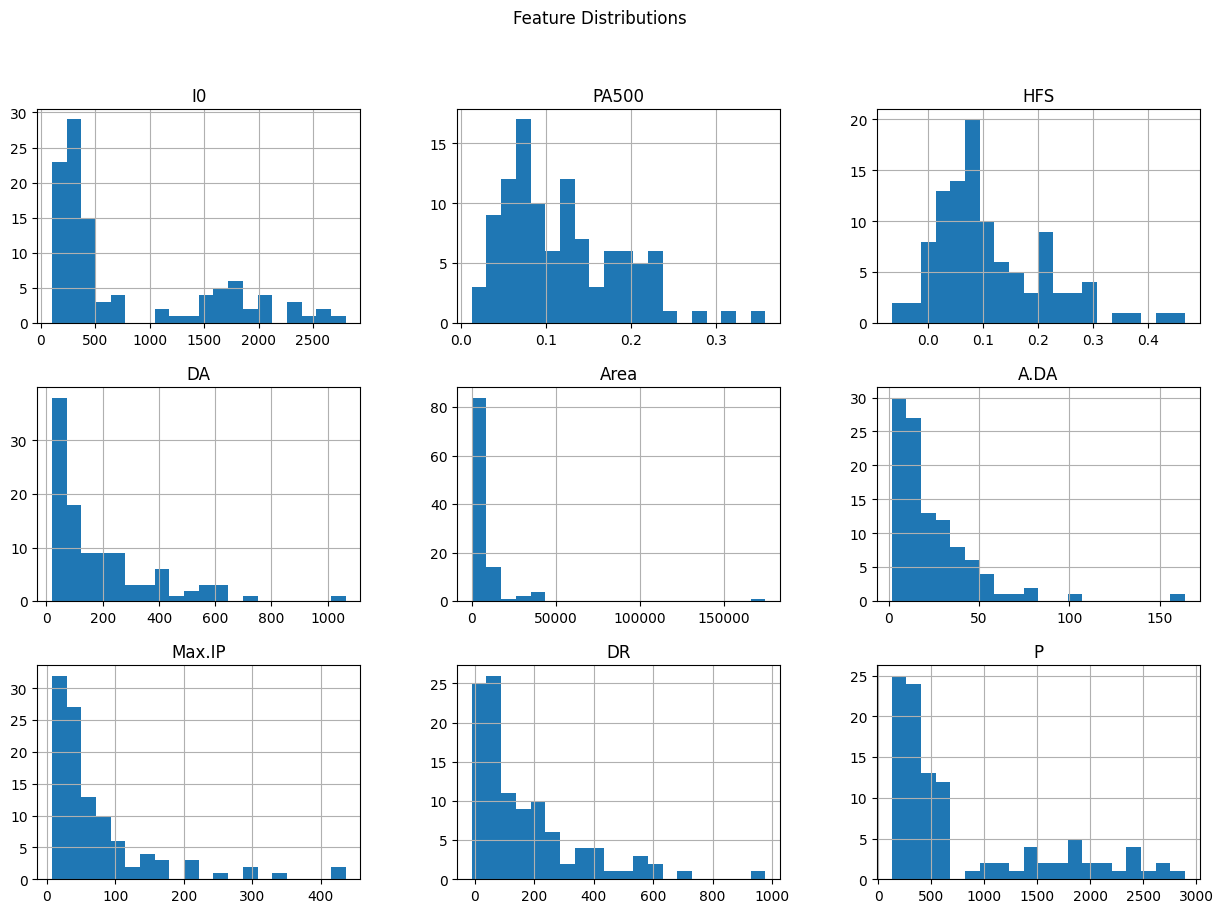

In [59]:
import matplotlib.pyplot as plt

# Plot histograms for all features
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


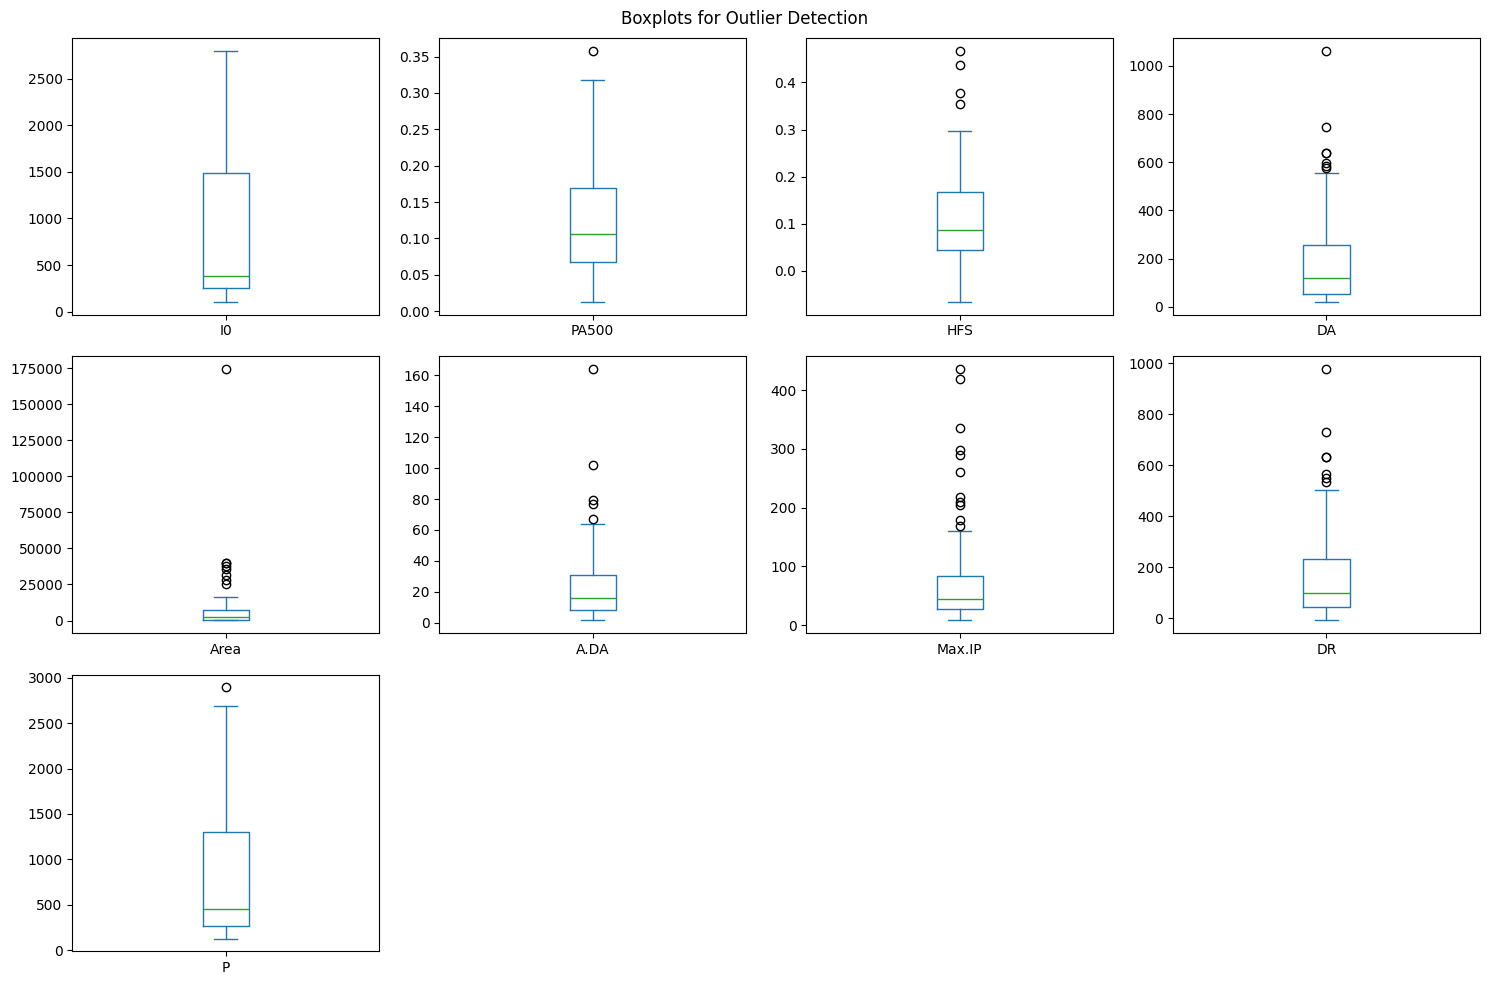

In [60]:
import matplotlib.pyplot as plt

# Plot boxplots for feature columns
data.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.suptitle('Boxplots for Outlier Detection')
plt.tight_layout()  # Adjust layout so titles and labels don't overlap
plt.show()


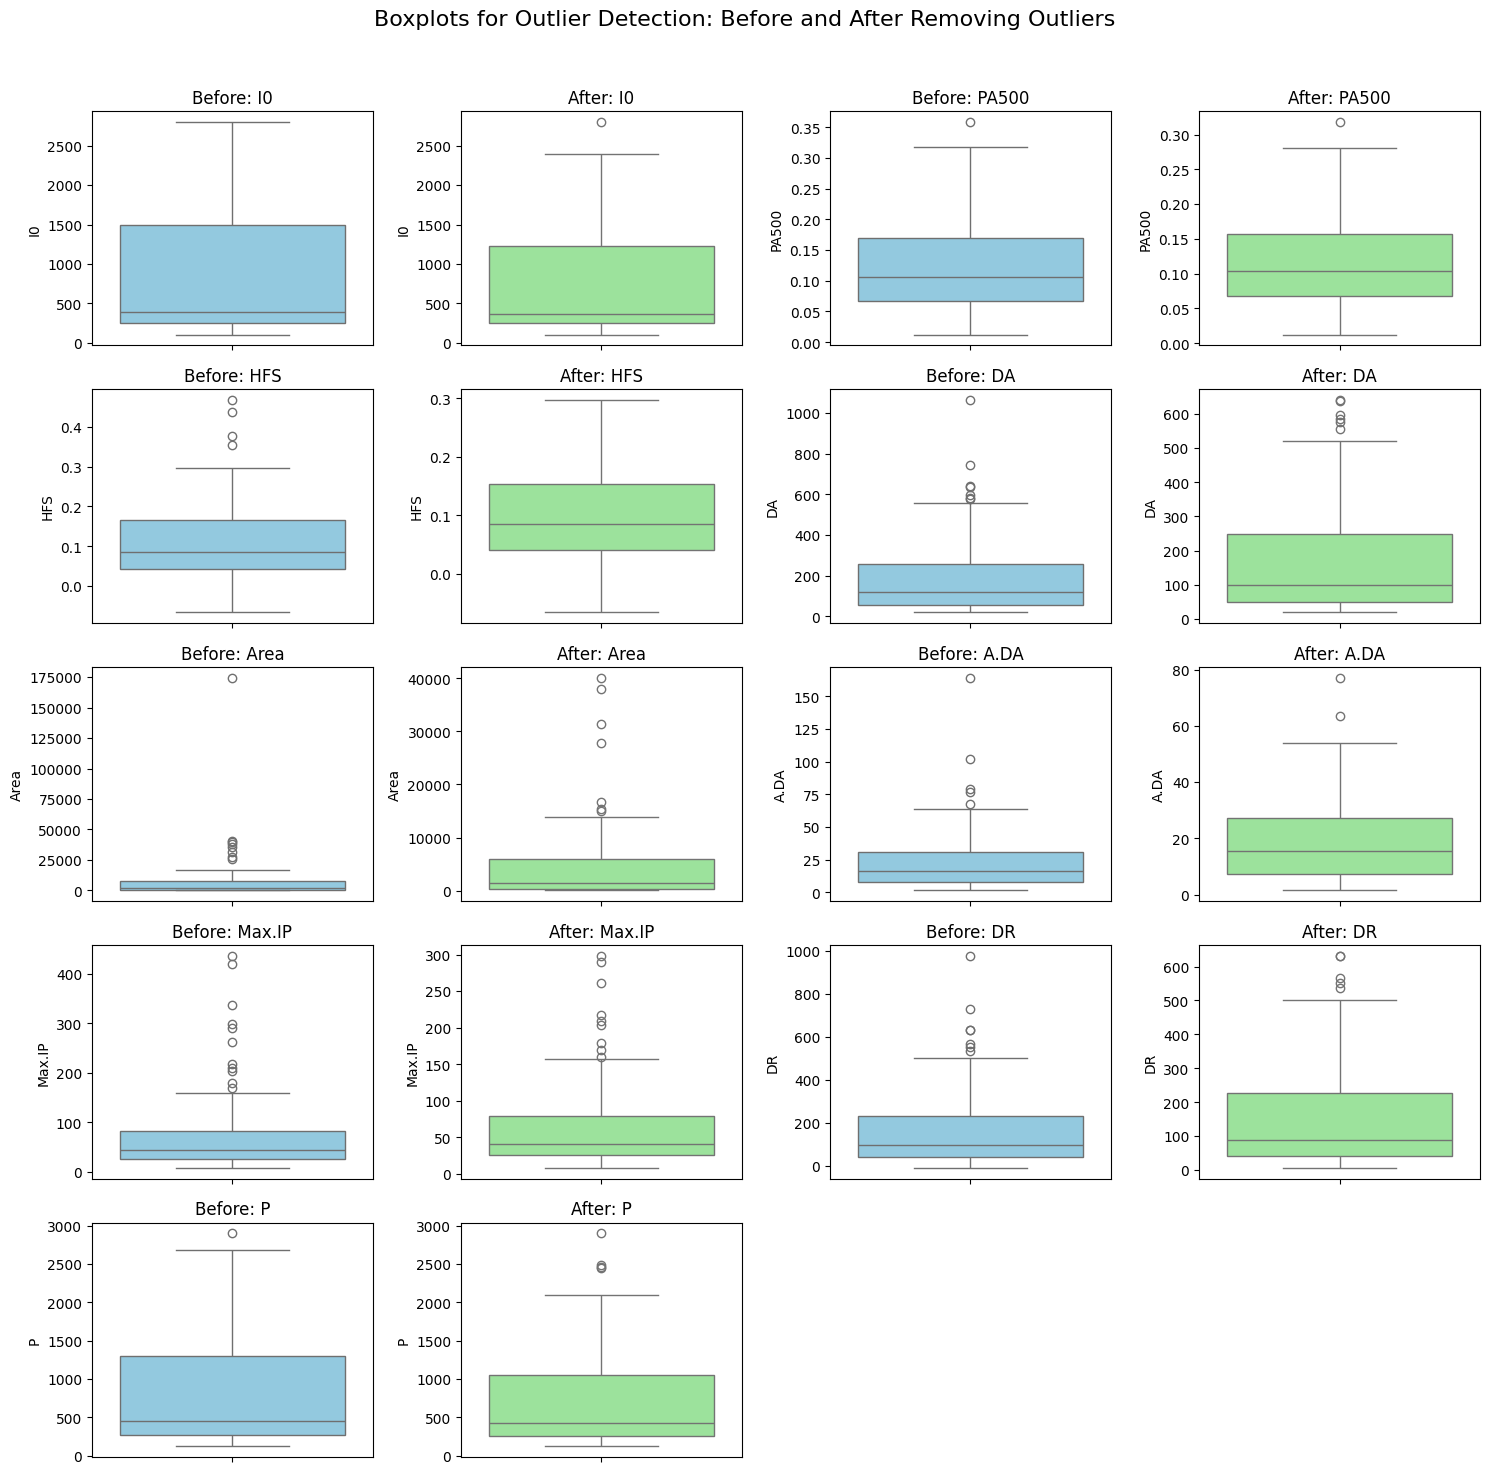

Outliers removed. Cleaned data saved as 'cleaned_data.csv'.


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
df = pd.read_csv('data.csv')

# Columns to check for outliers
columns = ['I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA', 'Max.IP', 'DR', 'P']

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    # Filtering out rows where Z-scores are below the threshold
    filtered_df = df[(z_scores < threshold).all(axis=1)]
    return filtered_df

# Remove outliers
df_cleaned = remove_outliers_zscore(df, columns)

# Plotting before and after removing outliers
plt.figure(figsize=(15, 15))

# Before removing outliers
for i, col in enumerate(columns):
    plt.subplot(5, 4, 2 * i + 1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f'Before: {col}')

# After removing outliers
for i, col in enumerate(columns):
    plt.subplot(5, 4, 2 * i + 2)
    sns.boxplot(y=df_cleaned[col], color="lightgreen")
    plt.title(f'After: {col}')

# Adjust layout and show the plots
plt.suptitle("Boxplots for Outlier Detection: Before and After Removing Outliers", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_data.csv', index=False)

print("Outliers removed. Cleaned data saved as 'cleaned_data.csv'.")


In [62]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Print the columns to identify the correct column name
print(df.columns)


Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA', 'Max.IP', 'DR',
       'P'],
      dtype='object')


In [63]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


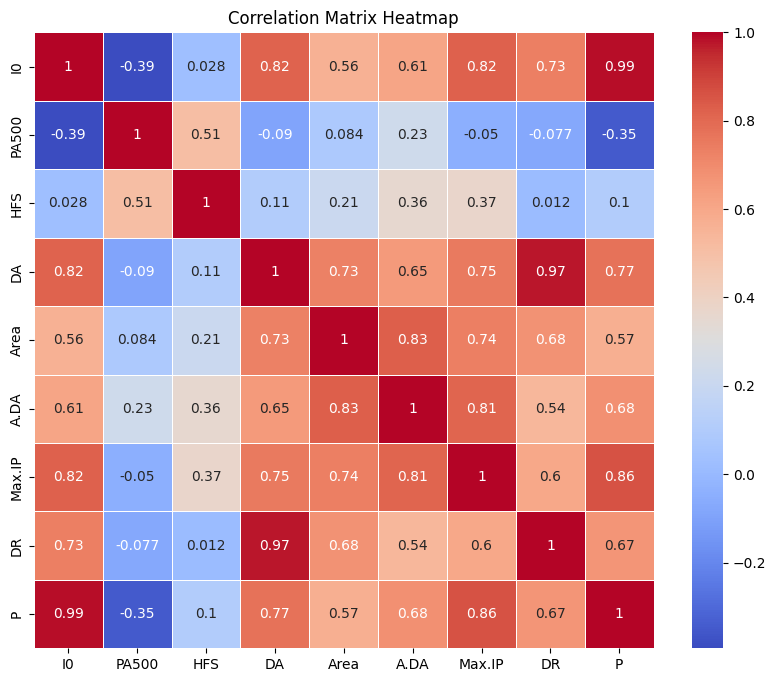

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [65]:
# Display column names to ensure 'Tumor' is present
print(data.columns)


Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA', 'Max.IP', 'DR',
       'P'],
      dtype='object')


In [66]:
# Check unique values in the 'Class' column to understand its content
print(data['Class'].unique())


['car' 'fad' 'mas' 'gla' 'con' 'adi']


In [67]:
# Convert 'Class' to numeric if it is categorical
# This assumes 'Class' contains categorical values like 'benign' and 'malignant'
data['Class'] = pd.factorize(data['Class'])[0]


In [68]:
# Recalculate correlation matrix
corr_matrix = data.corr()

# Verify the correlation matrix
print(corr_matrix.head())


          Class        I0     PA500       HFS        DA      Area      A.DA  \
Class  1.000000  0.779127 -0.640987 -0.156946  0.529739  0.329247  0.254786   
I0     0.779127  1.000000 -0.393647  0.028455  0.819606  0.560098  0.612070   
PA500 -0.640987 -0.393647  1.000000  0.509019 -0.089817  0.083547  0.229837   
HFS   -0.156946  0.028455  0.509019  1.000000  0.106977  0.206059  0.356028   
DA     0.529739  0.819606 -0.089817  0.106977  1.000000  0.731132  0.648334   

         Max.IP        DR         P  
Class  0.535302  0.462873  0.746426  
I0     0.823668  0.733252  0.988697  
PA500 -0.050401 -0.077054 -0.345715  
HFS    0.370827  0.011592  0.102362  
DA     0.753227  0.974202  0.774028  


In [69]:
# Compute correlation with 'Class'
if 'Class' in corr_matrix.columns:
    target_corr = corr_matrix['Class'].sort_values(ascending=False)
    print(target_corr)
else:
    print("The 'Class' column is not in the correlation matrix. Please check your data.")


Class     1.000000
I0        0.779127
P         0.746426
Max.IP    0.535302
DA        0.529739
DR        0.462873
Area      0.329247
A.DA      0.254786
HFS      -0.156946
PA500    -0.640987
Name: Class, dtype: float64


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = pd.read_csv('data.csv')

# Convert 'Class' to numeric if necessary
data['Class'] = pd.factorize(data['Class'])[0]

# Feature and target variables
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7 0 0 0 0 0]
 [0 1 4 0 0 0]
 [0 1 2 2 0 0]
 [0 1 1 3 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.33      0.20      0.25         5
           2       0.29      0.40      0.33         5
           3       0.60      0.60      0.60         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         4

    accuracy                           0.72        32
   macro avg       0.70      0.70      0.70        32
weighted avg       0.72      0.72      0.72        32



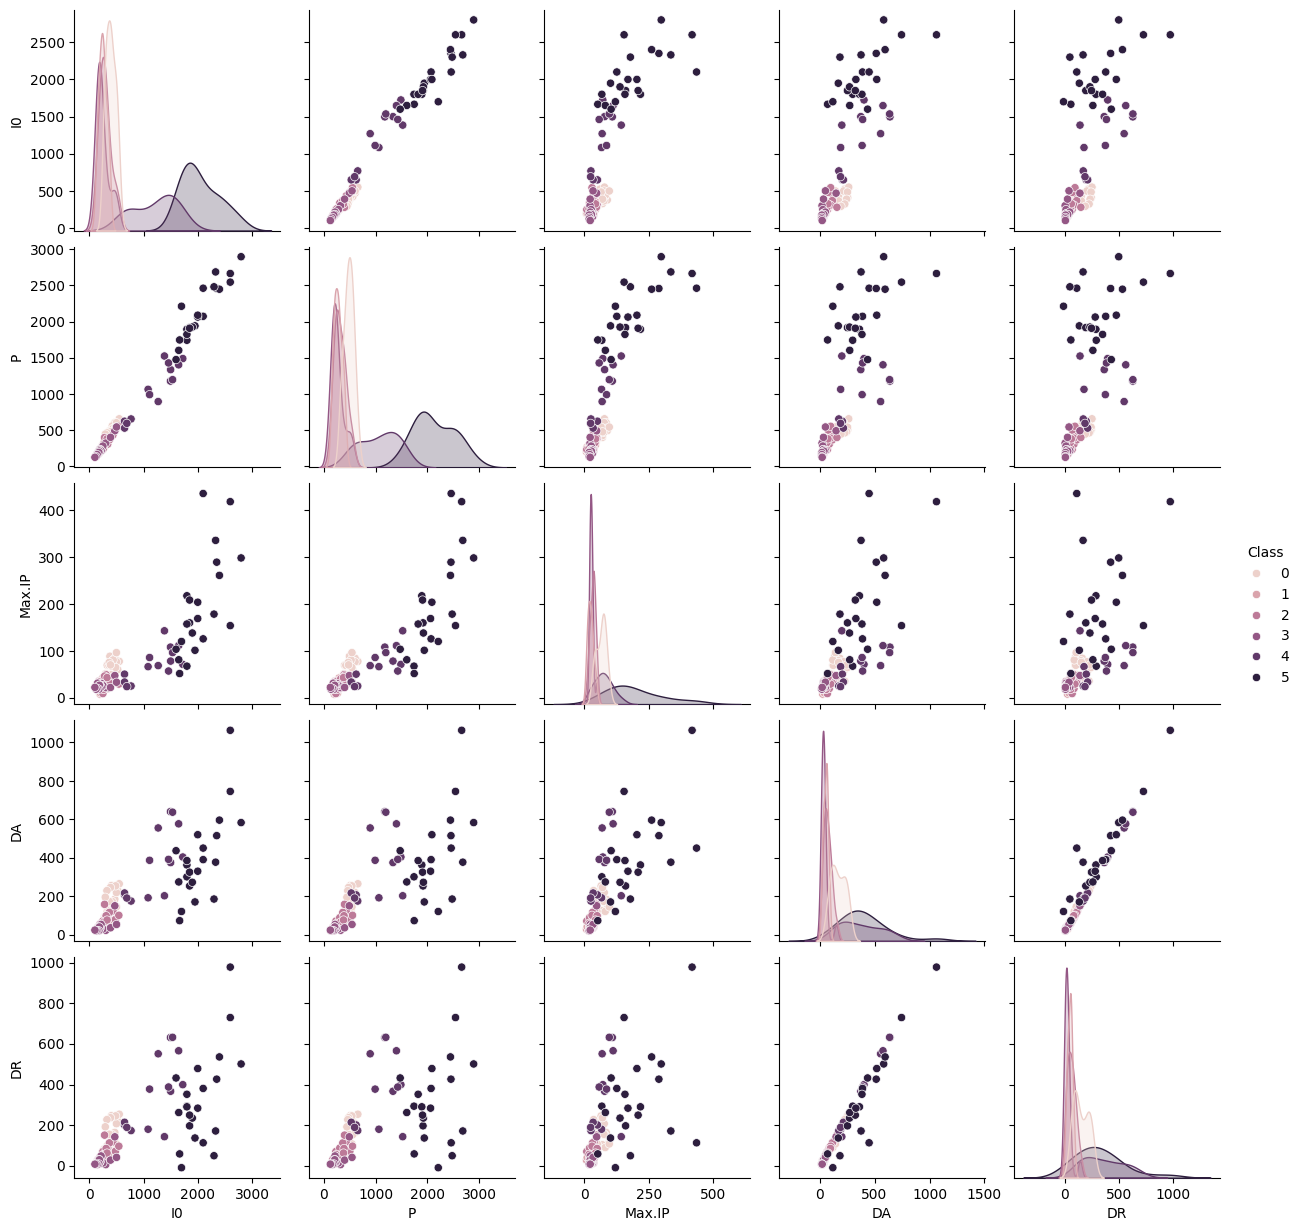

In [71]:
# Select top features correlated with the target
top_features = corr_matrix.nlargest(6, 'Class')['Class'].index

# Plot pairwise relationships
sns.pairplot(data[top_features], hue='Class')
plt.show()


Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA', 'Max.IP', 'DR',
       'P'],
      dtype='object')


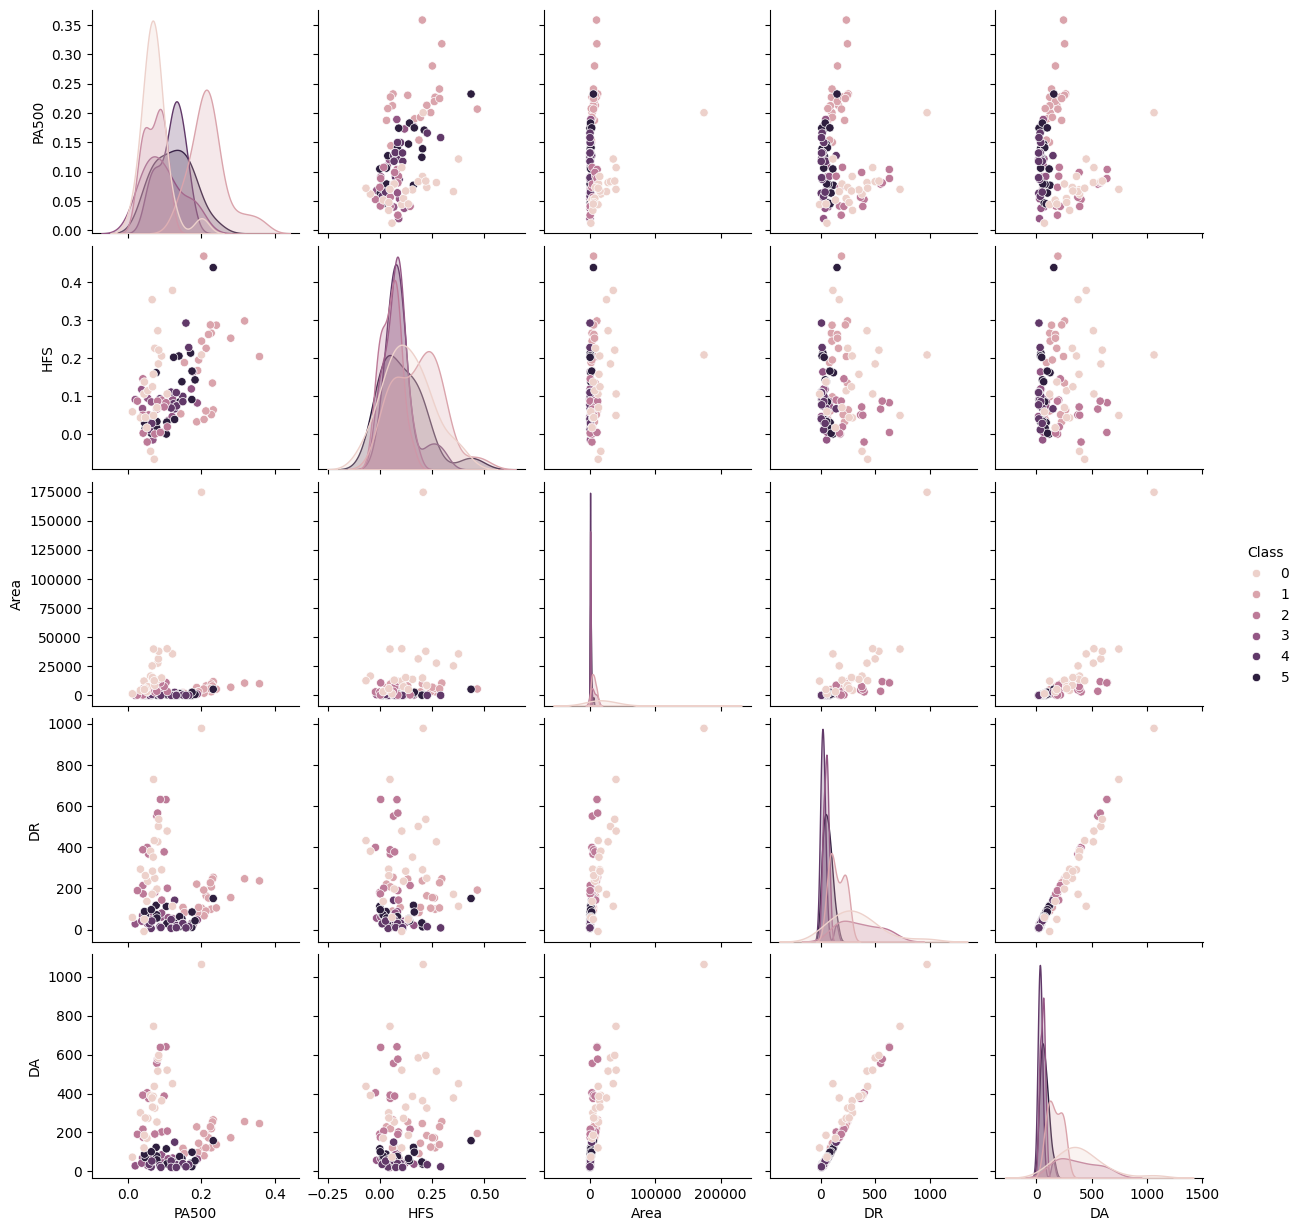

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('data.csv')

# Print column names to verify
print(data.columns)

# Convert 'Class' column if it's categorical
if data['Class'].dtype == 'object':
    label_encoder = LabelEncoder()
    data['Class'] = label_encoder.fit_transform(data['Class'])

# Apply log transformation to a numeric feature (if needed)
data['I0_log'] = np.log(data['I0'] + 1)  # Adding 1 to avoid log(0)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Recalculate the correlation matrix
corr_matrix = numeric_data.corr()

# Select top features correlated with 'Class'
top_features = corr_matrix.nlargest(6, 'Class')['Class'].index

# Plot pairwise relationships
sns.pairplot(numeric_data[top_features], hue='Class')
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Class', axis=1))

# Convert back to DataFrame for easier EDA continuation
X_scaled = pd.DataFrame(X_scaled, columns=data.columns.drop('Class'))


In [74]:
print(data['Class'].value_counts())


Class
0    22
1    21
5    18
4    16
3    15
2    14
Name: count, dtype: int64


In [75]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, data['Class'])

print("Resampled Dataset Shape:", X_res.shape, y_res.shape)


Resampled Dataset Shape: (132, 10) (132,)


In [77]:
# Save the preprocessed dataset for later use
preprocessed_data = pd.DataFrame(X_scaled, columns=data.columns.drop('Class'))
preprocessed_data['Class'] = data['Class'].values

# Save to CSV
preprocessed_data.to_csv('preprocessed_data.csv', index=False)


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [79]:
# Load your preprocessed data
data = pd.read_csv('preprocessed_data.csv')

# Assuming 'Class' is the target variable and others are features
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [81]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Evaluation")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Evaluation
[[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 1 0 4]
 [0 0 0 1 2 2]
 [0 0 0 1 2 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.33      0.20      0.25         5
           4       0.50      0.40      0.44         5
           5       0.25      0.40      0.31         5

    accuracy                           0.69        32
   macro avg       0.68      0.67      0.67        32
weighted avg       0.70      0.69      0.69        32



In [82]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
log_reg_predictions = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation")
print(confusion_matrix(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))


Logistic Regression Evaluation
[[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 3 0 2]
 [0 0 0 1 3 1]
 [0 0 0 0 3 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.75      0.60      0.67         5
           4       0.50      0.60      0.55         5
           5       0.40      0.40      0.40         5

    accuracy                           0.78        32
   macro avg       0.78      0.77      0.77        32
weighted avg       0.79      0.78      0.78        32



In [83]:
# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classifier Evaluation")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


SVM Classifier Evaluation
[[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 0 0 5]
 [0 0 0 0 2 3]
 [0 0 0 0 2 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         5
           4       0.50      0.40      0.44         5
           5       0.27      0.60      0.38         5

    accuracy                           0.69        32
   macro avg       0.63      0.67      0.64        32
weighted avg       0.65      0.69      0.66        32



c:\Users\Eshitha.I\OneDrive\Desktop\mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eshitha.I\OneDrive\Desktop\mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eshitha.I\OneDrive\Desktop\mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test data
    predictions = model.predict(X_test)
    
    # Calculate metrics
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    
    # Store results
    results[name] = {
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }


c:\Users\Eshitha.I\OneDrive\Desktop\mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eshitha.I\OneDrive\Desktop\mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eshitha.I\OneDrive\Desktop\mlops_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [85]:
for name, metrics in results.items():
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\nClassification Report:")
    print(metrics['classification_report'])
    print("\n" + "="*50 + "\n")


Model: Random Forest
Confusion Matrix:
[[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 1 0 4]
 [0 0 0 1 2 2]
 [0 0 0 1 2 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.33      0.20      0.25         5
           4       0.50      0.40      0.44         5
           5       0.25      0.40      0.31         5

    accuracy                           0.69        32
   macro avg       0.68      0.67      0.67        32
weighted avg       0.70      0.69      0.69        32



Model: Logistic Regression
Confusion Matrix:
[[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 3 0 2]
 [0 0 0 1 3 1]
 [0 0 0 0 3 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.0

In [86]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best model
best_model = None
best_model_name = ""
best_accuracy = 0

# Compare models based on accuracy
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test data
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Update the best model if the current model has a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

print(f"The best model is: {best_model_name} with accuracy: {best_accuracy}")

# Save the best model
import joblib
joblib.dump(best_model, 'best_model.pkl')


The best model is: Logistic Regression with accuracy: 0.78125


['best_model.pkl']

In [87]:
pip install streamlit joblib scikit-learn numpy pandas


Note: you may need to restart the kernel to use updated packages.
